# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [2]:
import pandas as pd

# Carregar o arquivo CSV
caminho_arquivo = r'C:\Users\Acer\Desktop\modulo 6\b1abb33c4f.csv'
dados_sinasc = pd.read_csv(caminho_arquivo)

# Visualizar as primeiras linhas do DataFrame
print(dados_sinasc.head())


   ORIGEM   CODESTAB  CODMUNNASC  LOCNASC  IDADEMAE  ESTCIVMAE  \
0       1  2679477.0      110001        1        19        5.0   
1       1  2679477.0      110001        1        29        2.0   
2       1  2679477.0      110001        1        37        9.0   
3       1  2516500.0      110001        1        30        5.0   
4       1  2516500.0      110001        1        30        2.0   

            ESCMAE  CODOCUPMAE  QTDFILVIVO  QTDFILMORT  ...  KOTELCHUCK  \
0      8 a 11 anos         NaN         0.0         0.0  ...           5   
1      8 a 11 anos    999992.0         1.0         0.0  ...           5   
2      8 a 11 anos    513205.0         2.0         0.0  ...           5   
3  12 anos ou mais    231205.0         0.0         0.0  ...           4   
4      8 a 11 anos    999992.0         1.0         0.0  ...           5   

  CONTADOR munResStatus munResTipo               munResNome  munResUf  \
0        1        ATIVO      MUNIC    Alta Floresta D'Oeste  Rondônia   
1     

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [4]:


# Suponha que 'dados_sinasc' seja o DataFrame que contém os dados

# Definir os intervalos e as categorias
intervalos = [-1, 3, 5, 7, 10]
categorias = ['asfixia grave', 'asfixia moderada', 'asfixia leve', 'normal']

# Categorizar a variável APGAR5
dados_sinasc['APGAR5_categoria'] = pd.cut(dados_sinasc['APGAR5'], bins=intervalos, labels=categorias, right=False)

# Visualizar as primeiras linhas do DataFrame com a nova coluna de categoria
print(dados_sinasc[['APGAR5', 'APGAR5_categoria']].head())


   APGAR5 APGAR5_categoria
0    10.0              NaN
1     9.0           normal
2    10.0              NaN
3    10.0              NaN
4    10.0              NaN


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

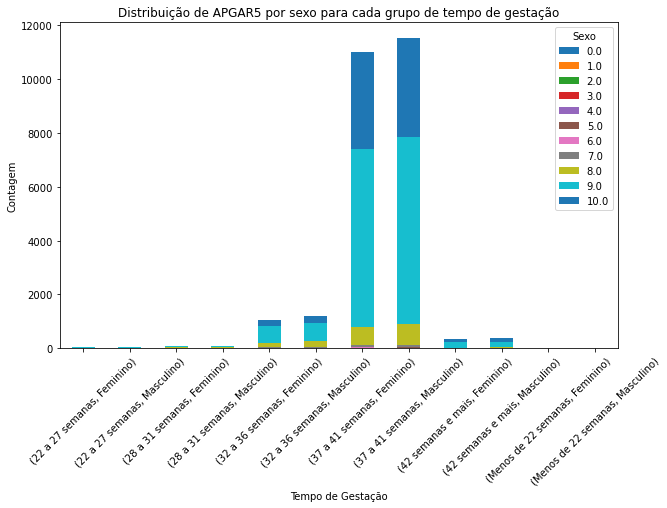

In [5]:

import matplotlib.pyplot as plt

# Suponha que 'dados_sinasc' seja o DataFrame que contém os dados

# Agrupar os dados por sexo e tempo de gestação e calcular a contagem de ocorrências de cada valor de APGAR5
grupo_apgar_gestacao_sexo = dados_sinasc.groupby(['GESTACAO', 'SEXO', 'APGAR5']).size().unstack(fill_value=0)

# Plotar o gráfico de barras empilhado
grupo_apgar_gestacao_sexo.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribuição de APGAR5 por sexo para cada grupo de tempo de gestação')
plt.xlabel('Tempo de Gestação')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.legend(title='Sexo')
plt.show()


####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [6]:


# Suponha que 'dados_sinasc' seja o DataFrame que contém os dados

# Criar a tabela cruzada
tabela_cruzada = pd.crosstab(index=dados_sinasc['GESTACAO'], columns=dados_sinasc['APGAR5'])

# Visualizar a tabela cruzada
print(tabela_cruzada)


APGAR5               0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   \
GESTACAO                                                                    
22 a 27 semanas         7     0     8     6     1     0     2    10    24   
28 a 31 semanas         0     0     2     1     5     7     7    11    61   
32 a 36 semanas         2     2     2     2     8    11    17    56   362   
37 a 41 semanas         5    20     3     5     7    21    45   151  1417   
42 semanas e mais       1     0     0     0     0     1     1     5    44   
Menos de 22 semanas     1     0     1     0     0     0     0     1     0   

APGAR5                9.0   10.0  
GESTACAO                          
22 a 27 semanas         19     8  
28 a 31 semanas         55    13  
32 a 36 semanas       1307   465  
37 a 41 semanas      13565  7284  
42 semanas e mais      423   223  
Menos de 22 semanas      3     1  


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [7]:
# Suponha que 'tabela_cruzada' seja a tabela cruzada do item anterior

# Calcular os percentuais de linha
percentuais_linha = tabela_cruzada.div(tabela_cruzada.sum(axis=1), axis=0) * 100

# Visualizar os percentuais de linha
print(percentuais_linha)

APGAR5                    0.0       1.0        2.0       3.0       4.0   \
GESTACAO                                                                  
22 a 27 semanas       8.235294  0.000000   9.411765  7.058824  1.176471   
28 a 31 semanas       0.000000  0.000000   1.234568  0.617284  3.086420   
32 a 36 semanas       0.089526  0.089526   0.089526  0.089526  0.358102   
37 a 41 semanas       0.022200  0.088798   0.013320  0.022200  0.031079   
42 semanas e mais     0.143266  0.000000   0.000000  0.000000  0.000000   
Menos de 22 semanas  14.285714  0.000000  14.285714  0.000000  0.000000   

APGAR5                   5.0       6.0        7.0        8.0        9.0   \
GESTACAO                                                                   
22 a 27 semanas      0.000000  2.352941  11.764706  28.235294  22.352941   
28 a 31 semanas      4.320988  4.320988   6.790123  37.654321  33.950617   
32 a 36 semanas      0.492390  0.760967   2.506714  16.204118  58.504924   
37 a 41 semanas    

####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

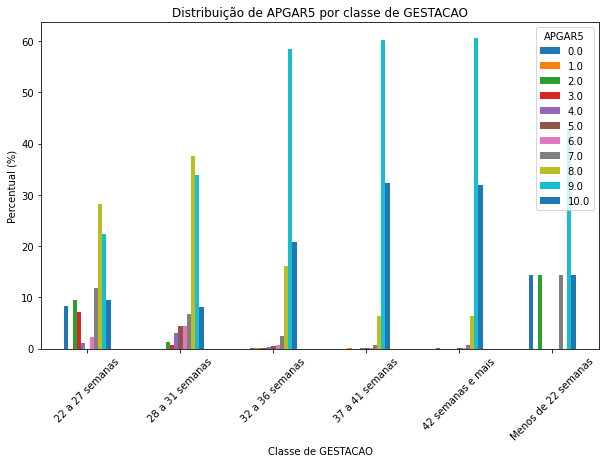

In [8]:


# Suponha que 'percentuais_linha' seja a tabela de percentuais de linha do item anterior

# Plotar o gráfico de barras
percentuais_linha.plot(kind='bar', figsize=(10, 6))
plt.title('Distribuição de APGAR5 por classe de GESTACAO')
plt.xlabel('Classe de GESTACAO')
plt.ylabel('Percentual (%)')
plt.xticks(rotation=45)
plt.legend(title='APGAR5')
plt.show()


#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

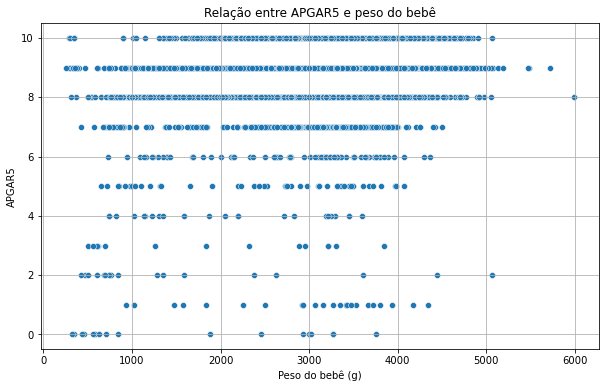

In [10]:
import seaborn as sns

# Plotar o gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PESO', y='APGAR5', data=dados_sinasc)
plt.title('Relação entre APGAR5 e peso do bebê')
plt.xlabel('Peso do bebê (g)')
plt.ylabel('APGAR5')
plt.grid(True)
plt.show()
